In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Create new default settings for ALL figures

In [221]:
%%capture

# Send gridlines to back (behind the graphical elements)
plt.rc('axes', axisbelow=True)

# Set figure size
plt.rc('figure', figsize=(10, 5))

# Set gridlines and ticks
plt.rc('axes', grid=True)
plt.rc('xtick.minor', visible=True)
plt.rc('ytick.minor', visible=True)

#----------------------------------------------------
# I've yet to find a way to set and customise default MINOR and MAJOR gridlines, and so I'll assign them throughout as:    

# plt.grid(which='minor', c='lightgrey')
# plt.grid(which='major', c='grey')
#----------------------------------------------------

# Import dataset

In [222]:
df1 = pd.read_csv('datasets/uber-raw-data-apr14.csv')
df1.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


# Convert datatime into pandas form - !! takes a few minutes !!

In [223]:
df1['Date/Time'] = df1['Date/Time'].map(pd.to_datetime) 
df1.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


# Add 3 columns for day of month, weekday and hour

In [229]:
# Create day of month column
def get_dom(dt):
    return dt.day

df1['dom'] = df1['Date/Time'].map(get_dom)


# Create weekday column
def get_weekday(dt):
    return dt.weekday()

df1['weekday'] = df1['Date/Time'].map(get_weekday)


# Create hour column
def get_hour(dt):
    return dt.hour

df1['hour'] = df1['Date/Time'].map(get_hour)


df1.head()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


# Plot day of month data as histogram

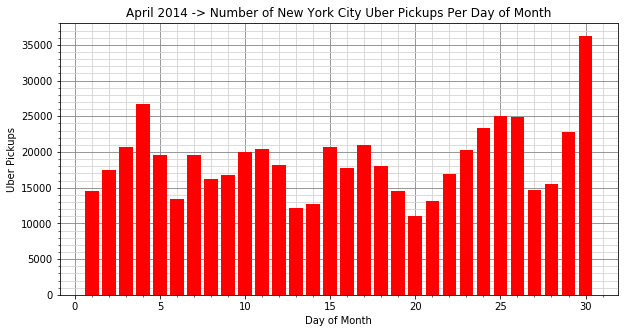

In [230]:
plt.hist(df1.dom, bins=30, rwidth=.8, range=(.5, 30.5), color='r')

plt.title('April 2014 -> Number of New York City Uber Pickups Per Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# From df1, sort day of month from least to most pickups

In [231]:
# Count number of rows
by_dom = df1.groupby('dom').apply(len)

by_dom_sorted = by_dom.sort_values()
by_dom_sorted


dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

# Plot data 'by_dom_sorted' as line graph

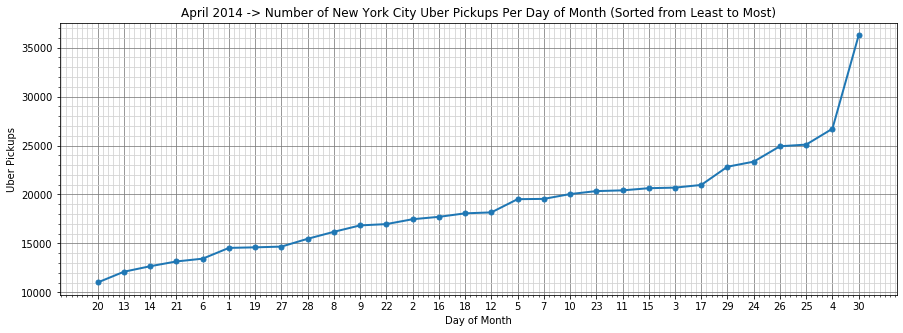

In [232]:
# Increase figure width to better view the x-axis
plt.figure(figsize=(15, 5))

plt.plot(range(1,31), by_dom_sorted, lw=2, marker='.', ms=10)
plt.xticks(range(1, 31), by_dom_sorted.index)

plt.title('April 2014 -> Number of New York City Uber Pickups Per Day of Month (Sorted from Least to Most)')
plt.xlabel('Day of Month')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# Plot weekday data as histogram


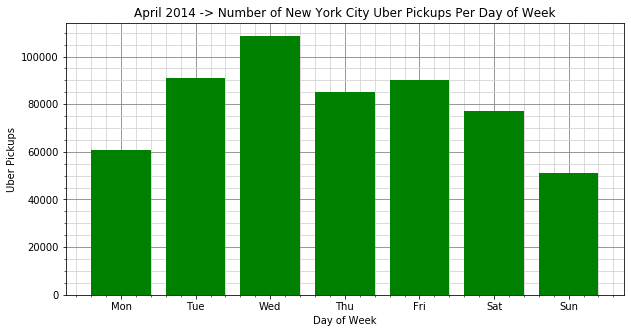

In [233]:
plt.hist(df1.weekday, bins=7, rwidth=.8, range=(-.5, 6.5), color='g')
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

plt.title('April 2014 -> Number of New York City Uber Pickups Per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# Plot hour data as histogram (24hr axis => 5=5am, 20=8pm)

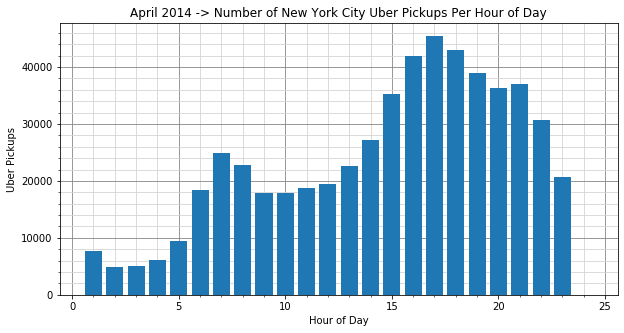

In [234]:
plt.hist(df1.hour, bins=24, rwidth=.8, range=(.5, 24.5))

plt.title('April 2014 -> Number of New York City Uber Pickups Per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# Cross analysis (hour, day of week)

In [235]:
df2 = df1.groupby('weekday hour'.split()).apply(len).unstack()
df2

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


# Plot df2 as heatmap

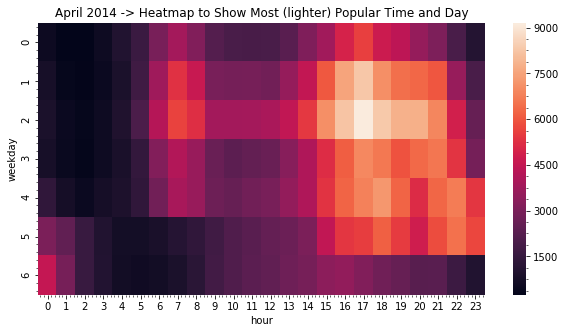

In [236]:
ax = sb.heatmap(df2)

ax.set_title("April 2014 -> Heatmap to Show Most (lighter) Popular Time and Day");


# Plot latitude and longitude data on same graph

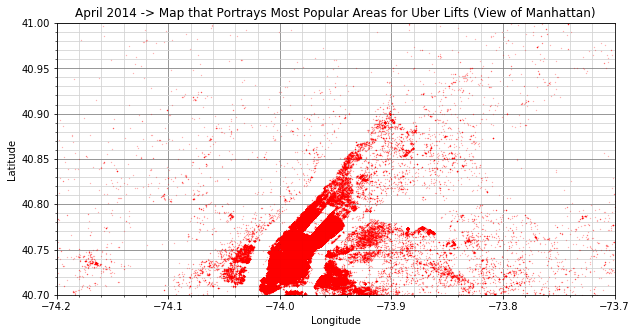

In [237]:
plt.plot(df1['Lon'], df1['Lat'], '.', ms=.5, alpha=.5, c='r')
plt.xlim(-74.2, -73.7)
plt.ylim(40.7, 41)

plt.title('April 2014 -> Map that Portrays Most Popular Areas for Uber Lifts (View of Manhattan)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')